# Time Series Forecasting Using Recurrent Neural Network - LSTMs - By Waqar Dongre

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from tensorflow import keras

import math
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
drive_path = "/content/drive/MyDrive/DSs/TimeSeries_DS_1/"

## Part 1 - Data Preprocessing

### Importing the training set

In [6]:
dataset_train = pd.read_csv(drive_path + 'Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [7]:
dataset_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [8]:
dataset_train.shape, training_set.shape

((1258, 6), (1258, 1))

In [9]:
training_set[: 3]

array([[325.25],
       [331.27],
       [329.83]])

### Scaling

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 120 timesteps and 1 output

In [11]:
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train.shape

(1138, 120, 1)

In [14]:
y_train.shape

(1138,)

## Part 2 - Building and Training the RNN

### Initialising the RNN

In [38]:
regressor = Sequential()

### Adding the 1st LSTM layer and some Dropout regularisation

In [39]:
regressor.add(LSTM(units = 300, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a 2nd LSTM layer and some Dropout regularisation

In [40]:
regressor.add(LSTM(units = 300, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a 3rd LSTM layer and some Dropout regularisation

In [41]:
regressor.add(LSTM(units = 300, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a 4th LSTM layer and some Dropout regularisation

In [42]:
regressor.add(LSTM(units = 300, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a 5th LSTM layer and some Dropout regularisation

In [43]:
regressor.add(LSTM(units = 300, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a 6th LSTM layer and some Dropout regularisation

In [44]:
regressor.add(LSTM(units = 300, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a 7th LSTM layer and some Dropout regularisation

In [45]:
regressor.add(LSTM(units = 300))
regressor.add(Dropout(0.2))

### Adding the output layer

In [46]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [47]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [48]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 50)

Epoch 1/200
23/23 [==============================] - 19s 307ms/step - loss: 0.9630
Epoch 2/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0254
Epoch 3/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0072
Epoch 4/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0057
Epoch 5/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0050
Epoch 6/200
23/23 [==============================] - 7s 302ms/step - loss: 0.0044
Epoch 7/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0047
Epoch 8/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0040
Epoch 9/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0042
Epoch 10/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0045
Epoch 11/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0038
Epoch 12/200
23/23 [==============================] - 7s 303ms/step - loss: 0.0040
Epoch 13/200

### Saving the model

In [49]:
regressor.save(drive_path + 'LSTM_h5_model_4.h5')

### Loading the model

In [50]:
#regressor = keras.models.load_model(drive_path + 'LSTM_h5_model_3.h5')

In [51]:
regressor.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 120, 1),
    'dtype': 'float32',
    'name': 'lstm_9_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'LSTM',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'batch_input_shape': (None, 120, 1),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dropout': 0.0,
    'dtype': 'float32',
    'go_backwards': False,
    'implementation': 2,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'lstm_9',
    'recurrent_activation': 'sigmoid',
    'recurrent_constraint': None,
    'recurrent_dropout': 0.0,
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'recurrent_regularizer': None,
    'return_sequences': True,
    'return_

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [52]:
dataset_test = pd.read_csv(drive_path + 'Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [53]:
dataset_test.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"


In [54]:
real_stock_price[: 3]

array([[778.81],
       [788.36],
       [786.08]])

### Getting the predicted stock price of 2017

In [55]:
dataset_test.shape

(20, 6)

In [56]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### RMSE 50 is very bad if stock price is 100 but very good if its 10000. In our case stock prices are in range of 760-860.

In [57]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

13.105203802458542


### Visualising the results

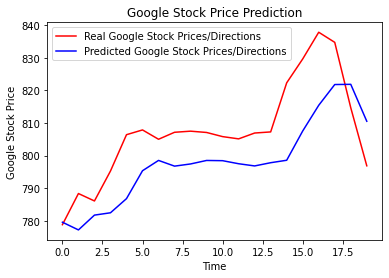

In [58]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Prices/Directions')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Prices/Directions')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()